In [17]:
import requests
import getpass
import pandas as pd

In [10]:
url = 'https://api.dendra.science/v2/'  
headers = {"Content-Type":"application/json"}

In [13]:
#Authenticate Dendra User:
# If you have a login and the data is not public, you must authenticate using your Dendra login
creds = {
    'email': getpass.getuser(),
    'strategy': 'local',
    'password': getpass.getpass()
}

In [14]:
r = requests.post(url+'authentication', json=creds)
if r.status_code != 201:
    print("Authentication to Dendra API failed")
    raise AssertionError

In [15]:
token = r.json()['accessToken']
headers['Authorization'] = token

In [25]:
#Example parameters
min_dt = pd.to_datetime("2016-01-01")
max_dt = pd.to_datetime("2020-01-01")
station_id = "64dbe9ca5c0d5f0fd8694a9f"
datastream_name = "Well Water Level xle/lev"

#Get existing datastream
r = requests.get(url + "datastreams", headers=headers, params = {
    "station_id": station_id,
}) 
assert r.status_code == 200

datastream_id = [ds['_id'] for ds in r.json()['data'] if datastream_name in ds['name']][0]

#Get datapoints from datastream
params = {
    "datastream_id": datastream_id,
    "time[$gte]": str(min_dt).replace(" ","T").replace(".000000000", "") + ".000Z",
    "time[$lt]": str(max_dt).replace(" ","T").replace(".000000000", "") + ".000Z",
    "$sort[time]": "1",
    "$limit": "2000",
    "time_local": False
}
r = requests.get(url + "datapoints", headers=headers, params = params)
assert r.status_code == 200

<AxesSubplot:>

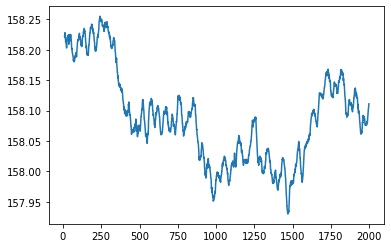

In [30]:
pd.DataFrame(r.json()['data'])['v'][10:].plot()